In [10]:
# steerlib - Helper library to create videos and plots

# modules
import fnmatch
import json
import seaborn as sns
import os
import numpy as np
import argparse
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import pickle

In [15]:
def load_json(filepath):
    """
    Load a json file
    Inputs
        filepath: string, path to file
    Outputs
        data: dictionary, json key, value pairs
    Example
    path = "~/git/msc-data/unity/roboRacingLeague/log/logs_Sat_Nov_14_12_36_16_2020/record_11640.json"
    js = load_json(path)
    """
    with open(filepath, "rt") as fp:
        data = json.load(fp)
    return data

In [16]:
def GetJSONSteeringAngles(filemask):
    """
    Get steering angles stored as 'user/angle' attributes in .json files
    Inputs:
        filemask: string, path and mask
    Outputs
        svals: list, steering values
    """
    filemask = os.path.expanduser(filemask)
    path, mask = os.path.split(filemask)

    matches = []
    for root, dirnames, filenames in os.walk(path):
        for filename in fnmatch.filter(filenames, mask):
            matches.append(os.path.join(root, filename))

    # steering values
    svals = []
    for fullpath in matches:
            frame_number = os.path.basename(fullpath).split("_")[0]
            json_filename = os.path.join(os.path.dirname(fullpath), "record_" + frame_number + ".json")
            jobj = load_json(json_filename)
            svals.append(jobj['user/angle'])
    return svals

In [64]:
def jsonSteeringBins(filemask, pname="output", save=True, nc=25, rmout=0):
    """
    Plot a steering values' histogram
    Inputs
        filemask: string, where to search for images, and corresponding .json files
        pname: string, output plot name
        save: boolean, save plot to disk
        nc: int, normalization constant, used in the simulator to put angles in range
        -1, 1. Default is 25.
        rmout: integer, outlier range to remove
    Outputs
        svals: list containing non-normalized steering angles
    Example:
    # svals = jsonSteeringBins('~/git/msc-data/unity/genRoad/*.jpg', 'genRoad', save=True, nc=25, rmout=20)
    """
    svals = GetJSONSteeringAngles(filemask)
    values = len(svals)
    svalscp = [element * nc for element in svals]
    if(rmout>0):
        my_iterator = filter(lambda svalscp: svalscp <= rmout and svalscp >= (-1 * rmout), svalscp)
        svalsrmout = list(my_iterator)
        svalscp = svalsrmout
        values = len(svalsrmout)
        print("Removed {} records".format(len(svals) - len(svalsrmout)))
        svals = svalsrmout
    mean = ("%.2f" % statistics.mean(svalscp))
    std = ("%.2f" % statistics.stdev(svalscp))
    plt.title=(pname)
    # NB Plotted as normalized histogram
    sns.distplot(svalscp, bins=nc*2, kde=False, norm_hist=True,
    axlabel= pname + ' st. degs. norm. hist. ' + str(values) + ' values, mean = ' + mean + ' std = ' + std)
    #if(save):
    #    sns.save("output.png")
    if(save):
        plt.savefig(pname + '.png')
    plt.show()
    # return for downstream processing if required
    return svals

In [63]:
def removeOutliers(svals, rmout, nc):
    """
    Remove outliers from a list
    Inputs
        svals: double, steering values
        rmout: integer, -+ range tp remove
        nc: steering normalization constant - same as used in simulator (max steering)
    Output
        svals: list, list with values excluded
    """
    svalscp = [element * nc for element in svals]
    my_iterator = filter(lambda svalscp: svalscp <= rmout and svalscp >= (-1 * rmout), svalscp)
    svalsrmout = list(my_iterator)
    svalscp = svalsrmout
    values = len(svalsrmout)
    print("Removed {} records".format(len(svalscp) - len(svalsrmout)))
    svals = svalsrmout  
    return svals

In [65]:
def listSteeringBins(svals, pname="output", save=True, nc=25, rmout=0):
    """
    Plot a steering values' histogram
    Inputs
        svals: list, array of normalized steering values
        pname: string, output plot name
        save: boolean, save plot to disk
        nc: int, normalization constant, used in the simulator to put angles in range
        -1, 1. Default is 25.
        rmout: integer, outlier range to remove
    Outputs
        none
    """
    svalscp = [element * nc for element in svals]
    values = len(svals)
    
    # remove outliers
    if(rmout>0):
        #my_iterator = filter(lambda svalscp: svalscp <= rmout and svalscp >= (-1 * rmout), svalscp)
        #svalsrmout = list(my_iterator)
        #svalscp = svalsrmout
        #values = len(svalsrmout)
        #print("Removed {} records".format(len(svals) - len(svalsrmout)))
        #svals = svalsrmout
        svals = removeOutliers(svalscp, rmout, nc)
        values = len(svals)
    mean = ("%.2f" % statistics.mean(svalscp))
    std = ("%.2f" % statistics.stdev(svalscp))
    plt.title=(pname)
    # NB Plotted as normalized histogram
    sns.distplot(svalscp, bins=nc*2, kde=False, norm_hist=True, 
    axlabel= pname + ' steer. degs. norm. hist. ' + str(values) + ' values, mean = ' + mean + ' std = ' + std)
    #if(save):
    #    sns.save("output.png")
    if(save):
        plt.savefig(pname + '.png')
    plt.show()

Removed 0 records


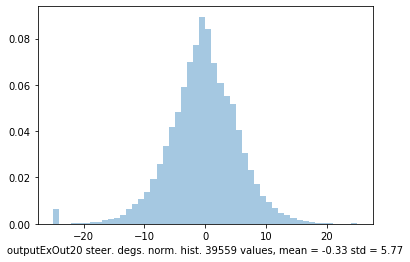

In [66]:
filemask = '~/git/msc-data/unity/genRoad/*.jpg'
svals = GetJSONSteeringAngles(filemask)
listSteeringBins(svals, pname="outputExOut20", save=True, nc=25, rmout=20)

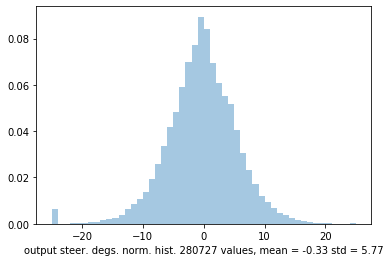

In [58]:
filemask = '~/git/msc-data/unity/genRoad/*.jpg'
svals = GetJSONSteeringAngles(filemask)
listSteeringBins(svals, pname="output", save=True, nc=25, rmout=0)

In [68]:
# generate training dataset latex tables for report
for folder in ['genRoad','log_sample', 'roboRacingLeague','smallLoop', 'smallLoopingCourse','warehouse']:
    print(folder)
    
"""
SDSandbox   unity/smallLoopingCourse/log/* 34443 from small\_looping\_course
SDSandbox   unity/warehouse/*   41126 From Warehouse course
SDSandbox   unity/smallLoop/*   45422   From small\_looping\_course
SDSandbox   unity/roboRacingLeague/* 12778 From "Robot Racing League" course
SDSandbox   unity/log\_sample   25791   From small\_looping\_course
SDSandbox   unity/genRoad 280727 From "Generated Road" course
"""

genRoad
log_sample
roboRacingLeague
smallLoop
smallLoopingCourse
warehouse


'\nSDSandbox   unity/smallLoopingCourse/log/* 34443 from small\\_looping\\_course\nSDSandbox   unity/warehouse/*   41126 From Warehouse course\nSDSandbox   unity/smallLoop/*   45422   From small\\_looping\\_course\nSDSandbox   unity/roboRacingLeague/* 12778 From "Robot Racing League" course\nSDSandbox   unity/log\\_sample   25791   From small\\_looping\\_course\nSDSandbox   unity/genRoad 280727 From "Generated Road" course\n'

In [ ]:
\begin{table}[]
\begin{center}
\begin{tabular}{|l|l|l|l|}
\hline
\multicolumn{4}{|c|}{Deliverables - Datasets} \\ \hline

%ID Task Deliverable Description
%1   Download  D1  Udacity real world dataset
%2   Generate    D2  Unity3D simulator data
%3   Combine D3  Udacity real and simulator data
%4   Mechanical Turk dry/rainy Ford dataset

ID & Task &  Deliverable & Description \\ \hline\hline
1 & Download & D1 &  Udacity real world dataset  \\ \hline
2 & Generate & D2 &  Udacity simulator data  \\ \hline
3 & Combine & D3 &  Udacity real and simulator data  \\ \hline
4 & Gather & D4 &  Mechanical Turk dry/rainy Ford dataset  \\ \hline

\end{tabular}
\end{center}
\caption{Datasets used to train models}
\label{Deliverables-Datasets}
\end{table}